# Merging of Metabolic Network Graphs: Reverse Ecology

The purpose of this notebook is to identify criteria for classifying GFMs (without 16S sequence data) as members of a particular tribe, based on shared amino acid identity (ANI). The metabolic models of these genomes will then be merged to give a model which is better representative of a particular tribe. Our reverse ecology analysis will then be performed on these merged models.

## Reverse Ecology Analysis on Merged Genomes

When the above analysis is complete, we will have sets of genomes whose metabolic network models can be merged to give a more comprehensive model for each tribe. For now, we will only merge graphs for those SAGs belonging to the same tribe.

First import the necessary preliminaries and custom functions.

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import graphFunctions as gf
import metadataFunctions as mf
import sbmlFunctions as sf
import seedFunctions as ef

# Define local folder structure for data input and processing.
rawModelDir = 'ProcessedModelFiles'
processedDataDir = 'MergedData'
summaryStatsDir = 'DataSummaries/MergedData'
externalDataDir = 'ExternalData'

First read in a file listing {lineage, clade, tribe} for each sample and aggregate all genomes belonging to the same tribe. The current input file taxonomySAGs.csv contains classifications for the SAGs only.

In [2]:
tribeSampleDict =  mf.importTaxonomy('../ExternalData/taxonomySAGs.csv')
tribeSampleDict

Importing taxonomy


{'Iluma-A2': ['AAA027E14'],
 'Iluma-B1': ['AAA027L17'],
 'Luna1-A2': ['AAA028P02'],
 'acI-A1': ['AAA027M14', 'AAA278O22'],
 'acI-A5': ['AAA028G02', 'AAA044O16'],
 'acI-A6': ['AAA028E20', 'AAA028I14'],
 'acI-A7': ['AAA023J06', 'AAA024D14', 'AAA041L13', 'AAA044N04'],
 'acI-B1': ['AAA023D18',
  'AAA027J17',
  'AAA027L06',
  'AAA028A23',
  'AAA278I18',
  'AB141P03'],
 'acI-B4': ['AAA044D11']}

Then, merge the metabolic network graphs for the samples from each tribe. Each sample is converted to a graph object and merged with the previous graph. The final graph is written to file.

In [3]:
gf.createTribalGraph(tribeSampleDict, processedDataDir, rawModelDir)

Merging genomes from individual tribes


The remaining code operates similarly to the RE analysis using all individual genomes. The metabolic network graphs corresponding to each tribe are imported:

In [4]:
dirList = mf.getDirList('../'+processedDataDir)
numSubDir = len(dirList)

Compute summary statistics on the size of each tribe's network graph.

Computing graph statistics


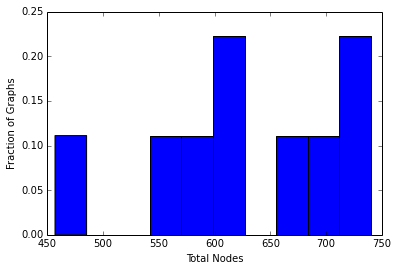

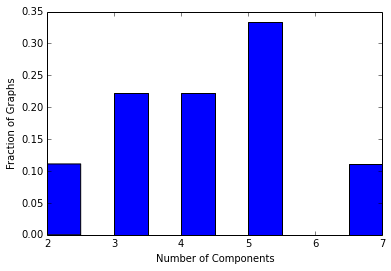

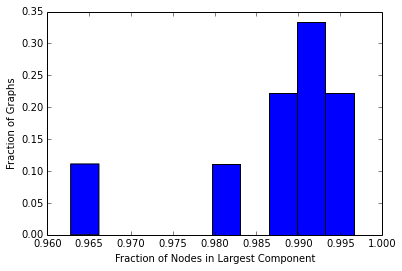

In [5]:
graphStatArray, diGraphStatArray = gf.computeGraphStats(dirList, processedDataDir, summaryStatsDir)
gf.plotGraphStats(graphStatArray)

Convert each network graph to its largest component.

In [6]:
reducedGraphStatArray = gf.reduceToLargeComponent(dirList, processedDataDir, summaryStatsDir)

Reducing to largest component


Compute seed sets and plot summary statistics.

Computing seed sets


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:2760 UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0


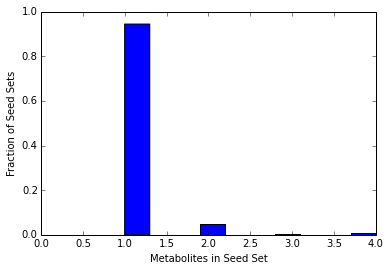

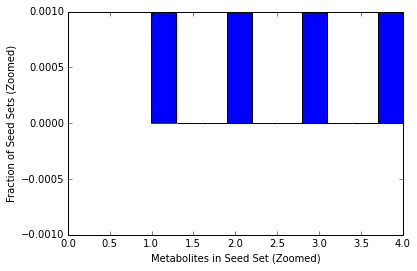

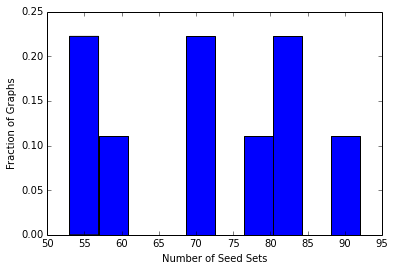

In [7]:
seedSetList = gf.computeSeedSets(dirList, externalDataDir, processedDataDir)
gf.plotSeedStatsForTribes(seedSetList, reducedGraphStatArray)

Aggregate the seed compounds for all tribes into a single matrix and write the results to file.

In [8]:
seedMatrixDF = ef.consolidateSeeds(dirList, externalDataDir, processedDataDir, summaryStatsDir)
ef.normalizedSeedCounts(dirList, processedDataDir, summaryStatsDir)

Consolidate seed sets
Computing normalized seed counts


Cluster the seed profiles and create the dendrogram:

Computing dendrogram


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371 UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure


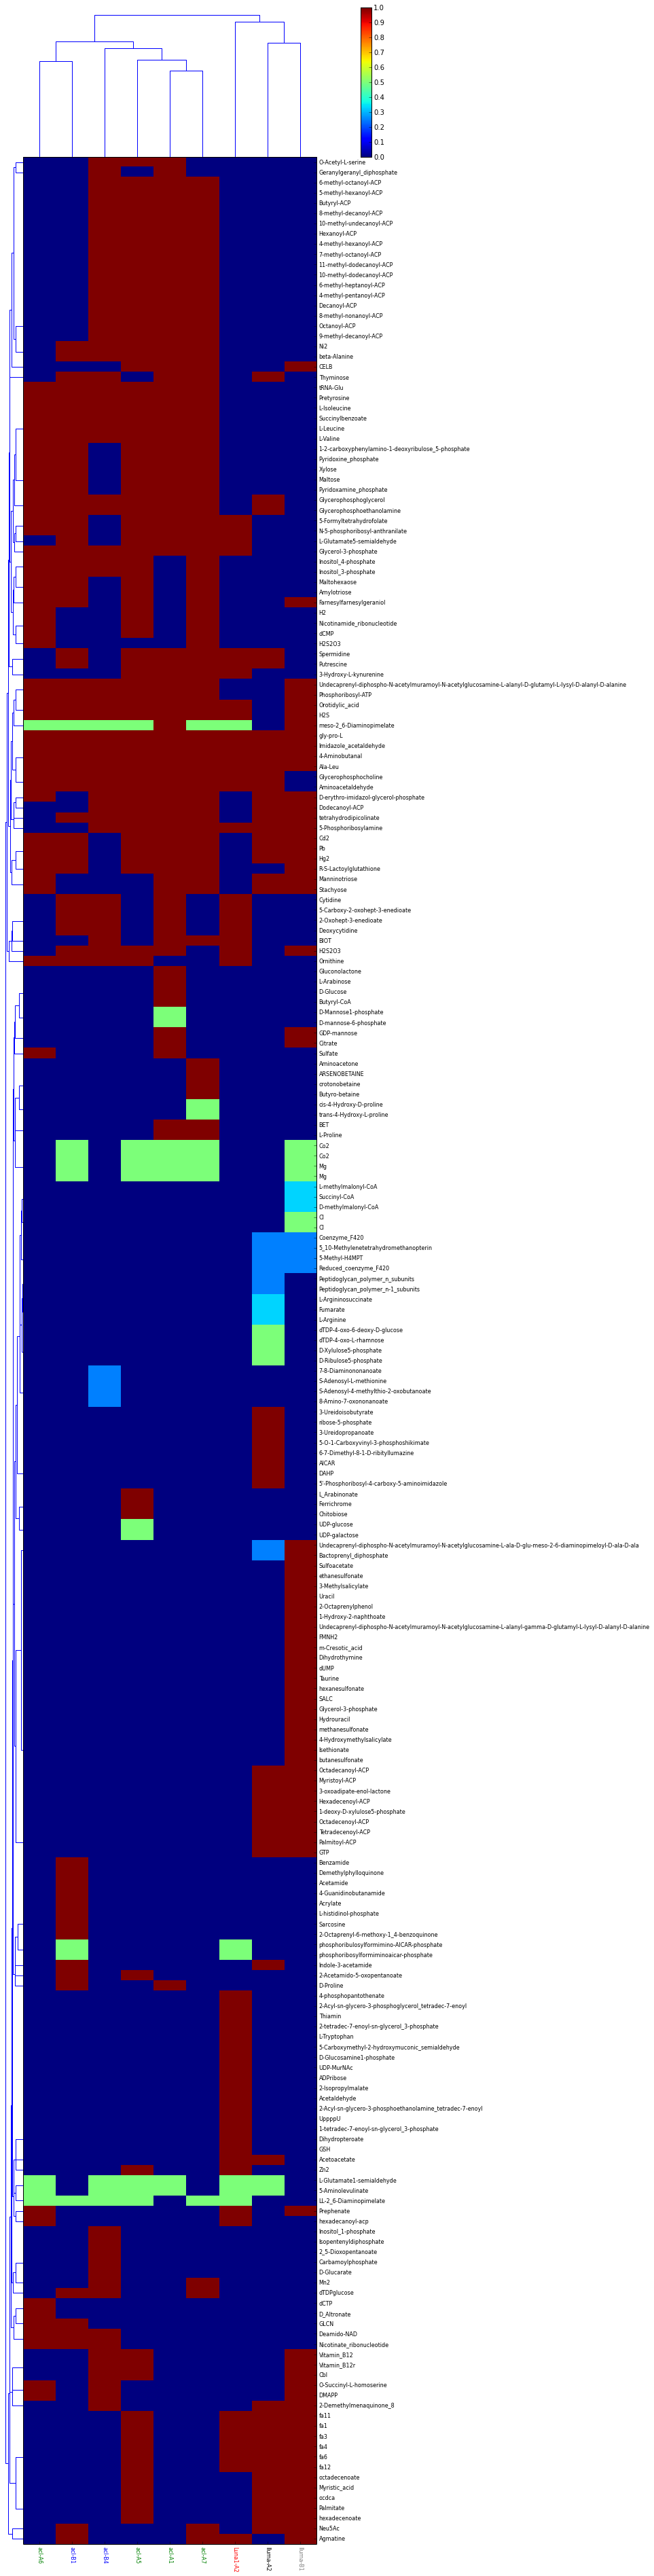

In [9]:
ef.clusterSeedSets(seedMatrixDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv')

Genomes in the above clustergram are colored as follows:

acI-A: blue
acI-B: green
acIV-A: red
acIV-B: cyan
acSTL-A: maroon

And here is just the dendrogram for genomes:

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1004 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axis.py:1011 UserWarning: Unable to find pixel distance along axis for interval padding; assuming no interval padding needed.


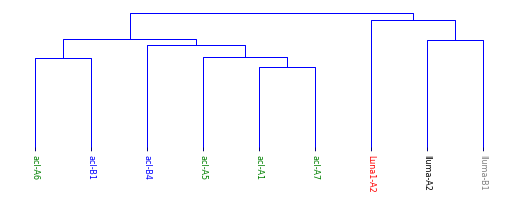

In [10]:
ef.clusterOnly(seedMatrixDF, dirList, externalDataDir, 'tribalColors.csv')

Compute the competition index

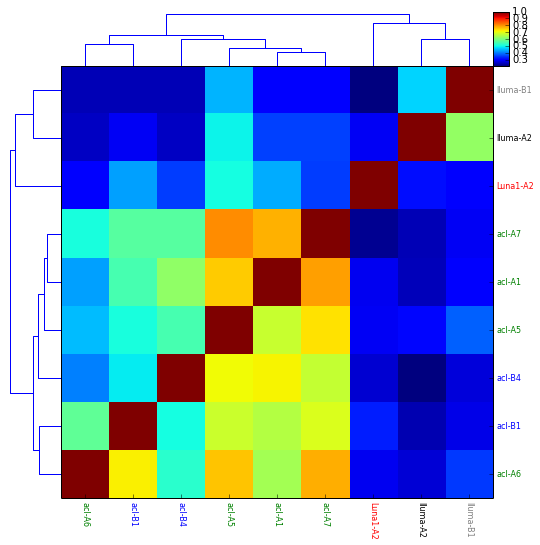

In [11]:
metabCompeteDF = ef.computeMetabCompete(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabCompeteDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv', 'metabolicCompetition.png')

Compute the cooperation index:

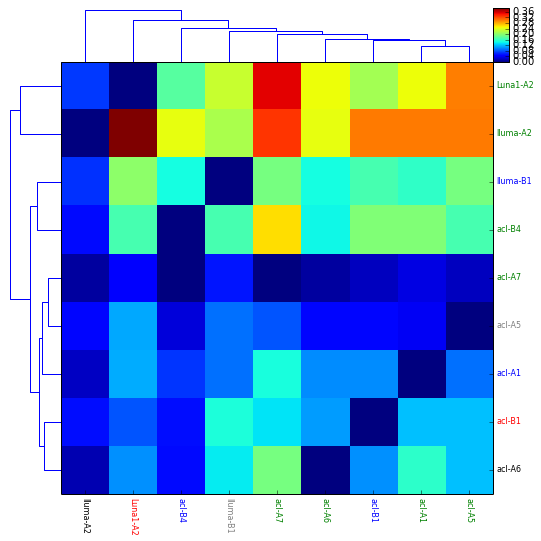

In [12]:
metabComplementDF = ef.computeMetabComplement(dirList, processedDataDir, summaryStatsDir)
ef.clusterPairwise(metabComplementDF, dirList, externalDataDir, summaryStatsDir, 'tribalColors.csv', 'metabolicComplementarity.png')

We are currently analyzing the seed profiles to look for shared features of the actinobacterial lineage, and unique features of each tribe. 


** TO DO **
1. Provide an illustration of what the "merging" process looks like for metabolic network graphs.